# Sierpinski's Triangle

Inspirend by the following video on [Reddit](https://www.reddit.com/r/interestingasfuck/comments/zeb4ol/how_sierpinskis_triangle_a_famous_fractal/) I came up with a solution on how to visualize Sierpinski's Triangle with Python and Matplotlib

In [255]:
import matplotlib.pyplot as plt
import numpy as np
import random
from itertools import chain
import IPython

%matplotlib inline

In [256]:
src="https://www.redditmedia.com/r/interestingasfuck/comments/zeb4ol/how_sierpinskis_triangle_a_famous_fractal/?ref_source=embed&amp;ref=share&amp;embed=true"
IPython.display.IFrame(src, width=638,height=640)

## Parameter

In [257]:
_max = 100.0

limits = [[(0.0,0.0)],
          [((_max/2),_max)],
          [(_max,0.0)]]

In [258]:
n_shots = 100000

## Create Initial Point within the triangle

In [259]:
def point_on_triangle(pt1, pt2, pt3):
    '''
    Create a random point within a triangle
    '''    
    x, y = sorted([random.random(), random.random()])
    
    s, t, u = x, y - x, 1 - y
    
    return (s * pt1[0][0] + t * pt2[0][0] + u * pt3[0][0],
            s * pt1[0][1] + t * pt2[0][1] + u * pt3[0][1])

init = point_on_triangle(limits[0],limits[1],limits[2])
init

(66.44321567111632, 20.030798111257763)

## Create Points

In [260]:
def new_point(start):
    '''
    Create new data point by inserting existing point
    '''    
    goal=random.choice(limits)
    
    _x = goal[0][0]-start[0]
    _y = goal[0][1]-start[1]
    
    _x2 = start[0]+_x/2.0
    _y2 = start[1]+_y/2.0
    
    new_point = [(_x2, _y2)]
    
    return new_point

In [261]:
points = []

for i in range(n_shots):
    if i == 0:
        start = new_point(init)
        points.append(start)
    else:
        np = new_point(start[0])
        points.append(np)
        start = np

## Split Points for X and Y

In [262]:
all_points = list(chain(*points))

y = [i[0] for i in all_points]
x = [i[1] for i in all_points]

## Plot Points

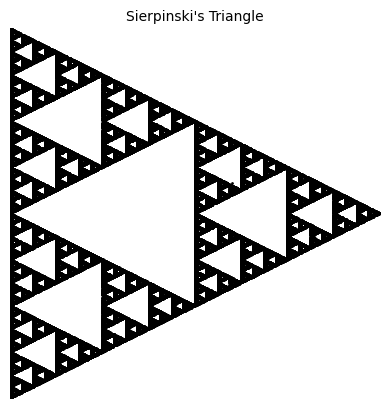

In [263]:
fig = plt.figure()

ax = fig.add_subplot()

ax.set_ylim([0, _max])
ax.set_xlim([0, _max])

ax.set_aspect('equal')
ax.set_title("Sierpinski's Triangle", fontsize=10)
ax.axis('off')

# plotting points as a scatter plot
plt.scatter(x, y,
            color= "black",
            s=1)

# function to show the plot
plt.show()

Kevin Kuhn, [Gopf.ai](https://gopf.ai/) – Dec. 2022